In [1]:
from sklearn.datasets import load_iris

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
iris = load_iris()

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

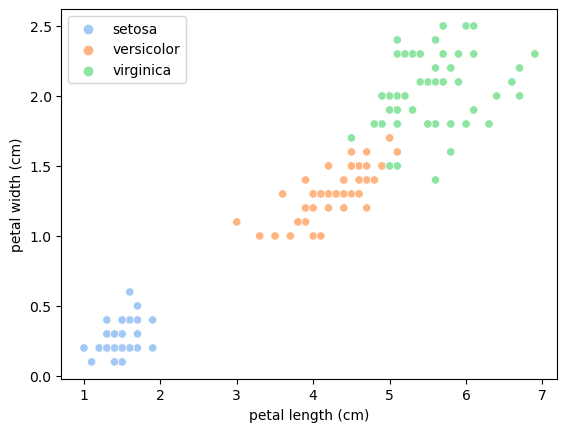

In [6]:
sns.scatterplot(x=df['petal length (cm)'], y=df['petal width (cm)'], 
                hue=iris.target_names[iris.target], palette='pastel')

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

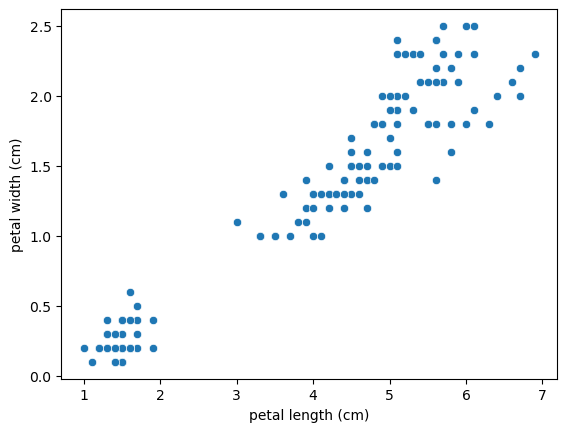

In [7]:
sns.scatterplot(x=df['petal length (cm)'], y=df['petal width (cm)'])

In [8]:
kmeans5 = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=0)

In [9]:
x = iris.data

In [10]:
y = kmeans5.fit_predict(x)

In [11]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 2 4 2 4 2 4 2 2 2 2 4 2 4 2 2 4 2 4 2 4 4
 4 4 4 4 4 2 2 2 2 4 2 4 4 4 2 2 2 4 2 2 2 2 2 4 2 2 1 4 3 1 1 3 2 3 1 3 1
 1 1 4 1 1 1 3 3 4 1 4 3 4 1 3 4 4 1 3 3 3 1 4 4 3 1 1 4 1 1 1 4 1 1 1 4 1
 1 4]


In [12]:
kmeans5.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [5.53214286, 2.63571429, 3.96071429, 1.22857143],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [6.24722222, 2.84722222, 4.775     , 1.575     ]])

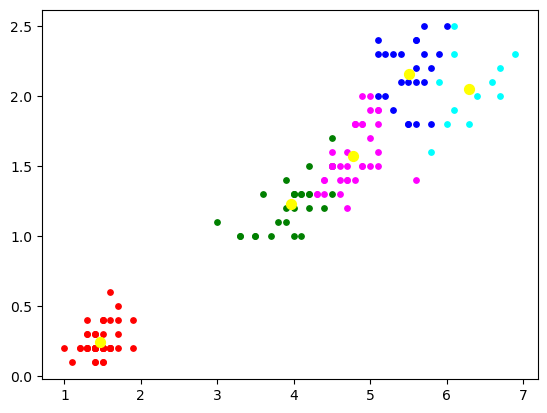

In [15]:
plt.scatter(x[y==0, 2], x[y==0, 3], s=15, c='red', label='Cluster 1' )
plt.scatter(x[y==1, 2], x[y==1, 3], s=15, c='blue', label='Cluster 2' )
plt.scatter(x[y==2, 2], x[y==2, 3], s=15, c='green', label='Cluster 3' )
plt.scatter(x[y==3, 2], x[y==3, 3], s=15, c='cyan', label='Cluster 4' )
plt.scatter(x[y==4, 2], x[y==4, 3], s=15, c='magenta', label='Cluster 5' )

plt.scatter(kmeans5.cluster_centers_[:, 2], kmeans5.cluster_centers_[:, 3], s=50, c='yellow',
           label='Centroids')

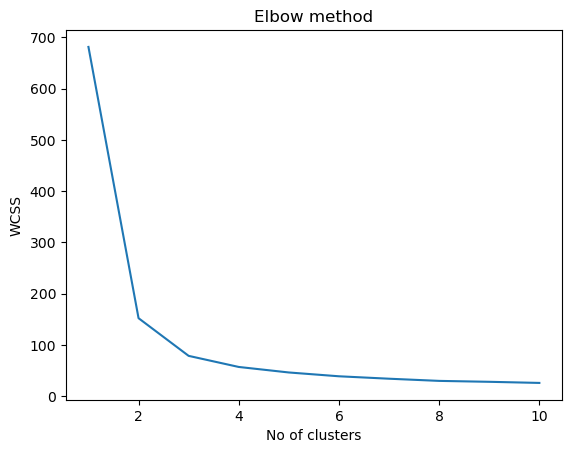

In [16]:
# Elbow method

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10,
                   random_state=0).fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)

plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
from sklearn.metrics import silhouette_score

In [19]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=0, n_init=10).fit(x) for k in range(2,11)]

In [21]:
sillouette_scores = [silhouette_score(x, model.labels_) for model in kmeans_per_k]

In [22]:
sillouette_scores

[0.6810461692117462,
 0.5528190123564095,
 0.49805050499728737,
 0.4930804067193522,
 0.3648340039670026,
 0.35668824765816953,
 0.36179003359738116,
 0.34885833427692653,
 0.3312211058478364]

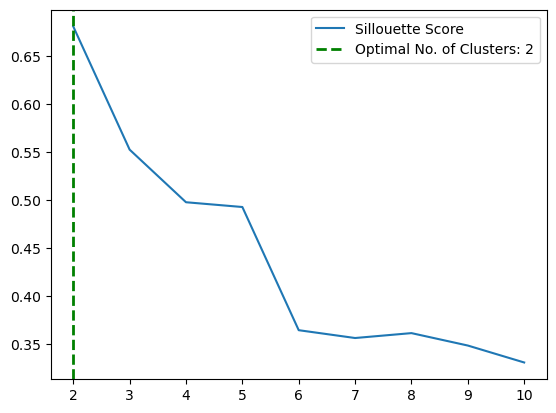

In [23]:
plt.plot(range(2,11), sillouette_scores, label='Sillouette Score')

k = np.argmax(sillouette_scores) + 2

plt.axvline(x=k, linestyle='--', c='green', linewidth=2, 
            label='Optimal No. of Clusters: {}'.format(k))

plt.legend()